# Assignment 2: Due Tuesday 9/19

## 2D Projectile Motion with Quadratic Drag 

Quadratic drag term is given by $\vec{f}_{drag} = -cv\vec{v}$. This leads to equations of motion in the horizontal ($x$) and vertical ($y$) directions given by 

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

,where $'$ is a time derivative.

You can read more about drag forces here: https://openstax.org/books/university-physics-volume-1/pages/6-4-drag-force-and-terminal-speed

## Problem

To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter, $D = 15\;cm$, density $\rho = 7.8\;g/cm^3$) that is fired with initial velocity $300 m/s$ at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = c(y) v^2$ where $c(y) = \gamma D^2 exp(-y/\lambda)$ with $\gamma$ given as $0.25\;N\cdot s^2/m^4$ and $\lambda = 10,000\;m$. 

# Part a)

Ignoring air resistance completely, write down the equations of motion for the cannonball (use the markup feature in Jupyter notbook and latex (https://en.wikibooks.org/wiki/LaTeX/Mathematics)). Your answer should depend on only $v_x, v_y,$ and $g$ 

Equations with no air resistance ($c = 0$):

* $v_x' = 0$ 

* $x' = v_x$

* $v_y' = -G$

* $y' = v_y$

Code the equations into a function 

In [1]:
import numpy as np
import math
import scipy
import matplotlib.pyplot as plt
%matplotlib notebook
#define projectile motion function in vaccum

initial_velocity = 300.0 

G = -9.80665
angle_theta = math.radians(50.0)


def proj_vac(t, state):
    
    
    
    #time = ((2*initial_velocity*np.sin(angle_theta))/(-1*G))
    
    x = state[0]
    y = state[1]
    v_x = state[2]
    v_y = state[3]
    
    
    #functions of x & y projectile motion in a vacuum
    #x_motion = x + (initial_velocity*np.cos(angle_theta)*t)

    #y_motion = y + ((initial_velocity*np.sin(angle_theta)*t) - (.5*(G*(t**2))))
    
    return_state = [v_x, v_y, 0, G]
    
    return return_state
    
    


Using Scipy (*RK4(5)* method) solve numerically $x(t)$ and $y(t)$ for $0 \le t \le 50\;s$

In [2]:
import scipy

total_time = ((2*initial_velocity*np.sin(angle_theta))/(-1*G)) #used to calculate total airtime

timeLimit = np.linspace(0, total_time, num = 50)

state_0 = [0.0, 0.0, (300.0 * np.cos(math.radians(50.0))), (300.0 * np.sin(math.radians(50.0)))]

time_array = scipy.integrate.solve_ivp(proj_vac, (0, 50), state_0 , method = 'RK45', t_eval = timeLimit) #integrate and store values

print(time_array) #display array values



  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  9.565e-01 ...  4.591e+01  4.687e+01]
        y: [[ 0.000e+00  1.844e+02 ...  8.854e+03  9.038e+03]
            [ 0.000e+00  2.153e+02 ...  2.153e+02  4.093e-12]
            [ 1.928e+02  1.928e+02 ...  1.928e+02  1.928e+02]
            [ 2.298e+02  2.204e+02 ... -2.204e+02 -2.298e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 50
     njev: 0
      nlu: 0


Plot the ball's trajectory (vertical vs. horizontal positions) and find it's horizontal range. At what time does the ball hit the ground?

<IPython.core.display.Javascript object>


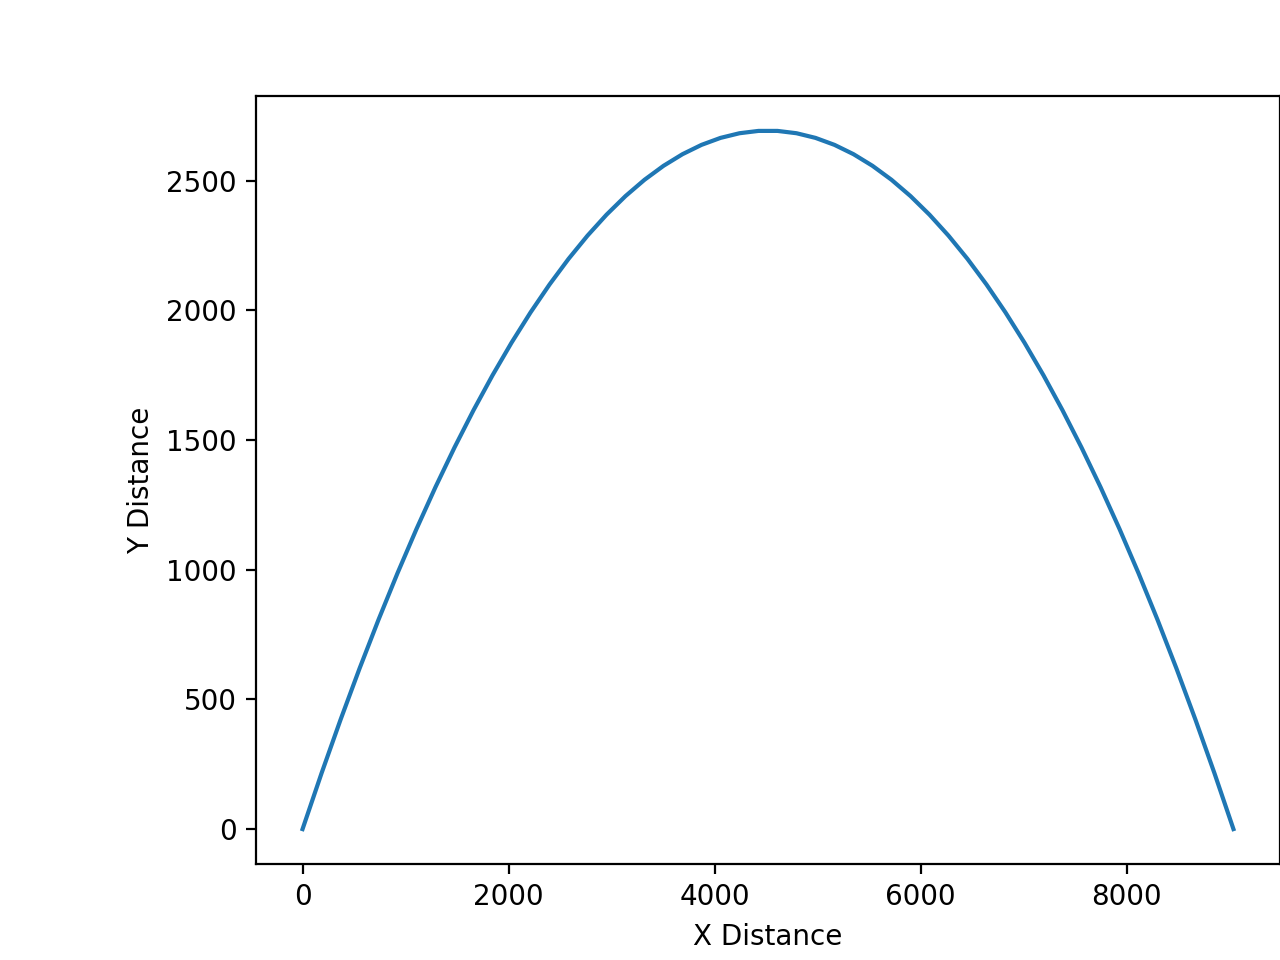

The total flighttime is 35.39 seconds.
The X distance covered is 9038.02 meters.


In [27]:
total_time = (time_array.t[time_array.y[1] >= 0]) #calculate when Y >=0 to determine time

x_values = time_array.y[0]

y_values = time_array.y[1]

restriction = np.where(time_array.y[1] >=0) #restricts so only positive y values are displayed

x_restricted = x_values[restriction] #new restricted x values

y_restricted = y_values[restriction] #new restricted y values



fig = plt.figure()
ax = fig.add_axes([0.2,0.1,0.8,0.8])
ax.plot(x_restricted, y_restricted) #plot the restricted values
ax.set_xlabel('X Distance')
ax.set_ylabel('Y Distance')





print("The total flighttime is", f'{total_time2[-1]:.2f}', "seconds.")

print("The X distance covered is", f'{x_restricted[-1]:.2f}', "meters.")

# Part b)

Write your own Runge-Kutta order 4 function and use it to solve Part a) [Meaning do not use Scipy for this part].

In [4]:
def my_RK45(func, t0, y0, t_end, height_max, tol):
    
    #initial state
    
    t = t0
    
    h = height_max
    
    y = y0
    
    t_values[]
    
    y_values[]
    
    while(t< t_end)
        
        k1 = h * f(t, y)
        
        k2 = h * f(t + 1/4 * h, y + 1/4 * k1)
        
        k3 = h * f(t + 3/8 * h, y + 3/32 * k1 + 9/32 * k2)

How does your Runge-Kutta 4th order evaluation compare to Scipy's *RK4(5)* method?

# Part c)

Now include air resistance, but ignore the variation of atmospheric pressure [that is  treat $c(y)$ as a constant  that does not change with position, where $c = \gamma D^2$].

Write down the equations of motion (use the markup feature in Jupyter notbook and latex). Your answers should depend only on $c, m, v, v_x, v_y,$ and $g$.

Equations with no air resistance ($c = const$):


* $v_x' = 0$ 

* $x' = v_x$

* $v_y' = -G$

* $y' = v_y$

Code the equations into a function

In [5]:
def proj_vac_air_resistance(t, state):
    
    #time = ((2*initial_velocity*np.sin(angle_theta))/(-1*G))
    
    x = state[0]
    y = state[1]
    v_x = state[2]
    v_y = state[3]
    
    with_drag_force = .25*(15**2) #unsure of 15 or .15??
    
    return_state = [v_x - with_drag_force, v_y - with_drag_force, 0, G]
    
    return return_state

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 35\;s$

In [6]:
time = ((2*initial_velocity*np.sin(angle_theta))/(-1*G)) #used to calculate total airtime

timeLimit = np.linspace(0, time, num = 50)

state_0 = [0.0, 0.0, (300.0 * np.cos(math.radians(50.0))), (300.0 * np.sin(math.radians(50.0)))]

time_array2 = scipy.integrate.solve_ivp(proj_vac_air_resistance, (0, 50), state_0 , method = 'RK45', t_eval = timeLimit)

print(time_array2)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  9.565e-01 ...  4.591e+01  4.687e+01]
        y: [[ 0.000e+00  1.306e+02 ...  6.271e+03  6.402e+03]
            [ 0.000e+00  1.615e+02 ... -2.367e+03 -2.636e+03]
            [ 1.928e+02  1.928e+02 ...  1.928e+02  1.928e+02]
            [ 2.298e+02  2.204e+02 ... -2.204e+02 -2.298e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 50
     njev: 0
      nlu: 0


Plot the ball's trajecory and find it's horizontal range. At what time does the ball hit the ground?

<IPython.core.display.Javascript object>


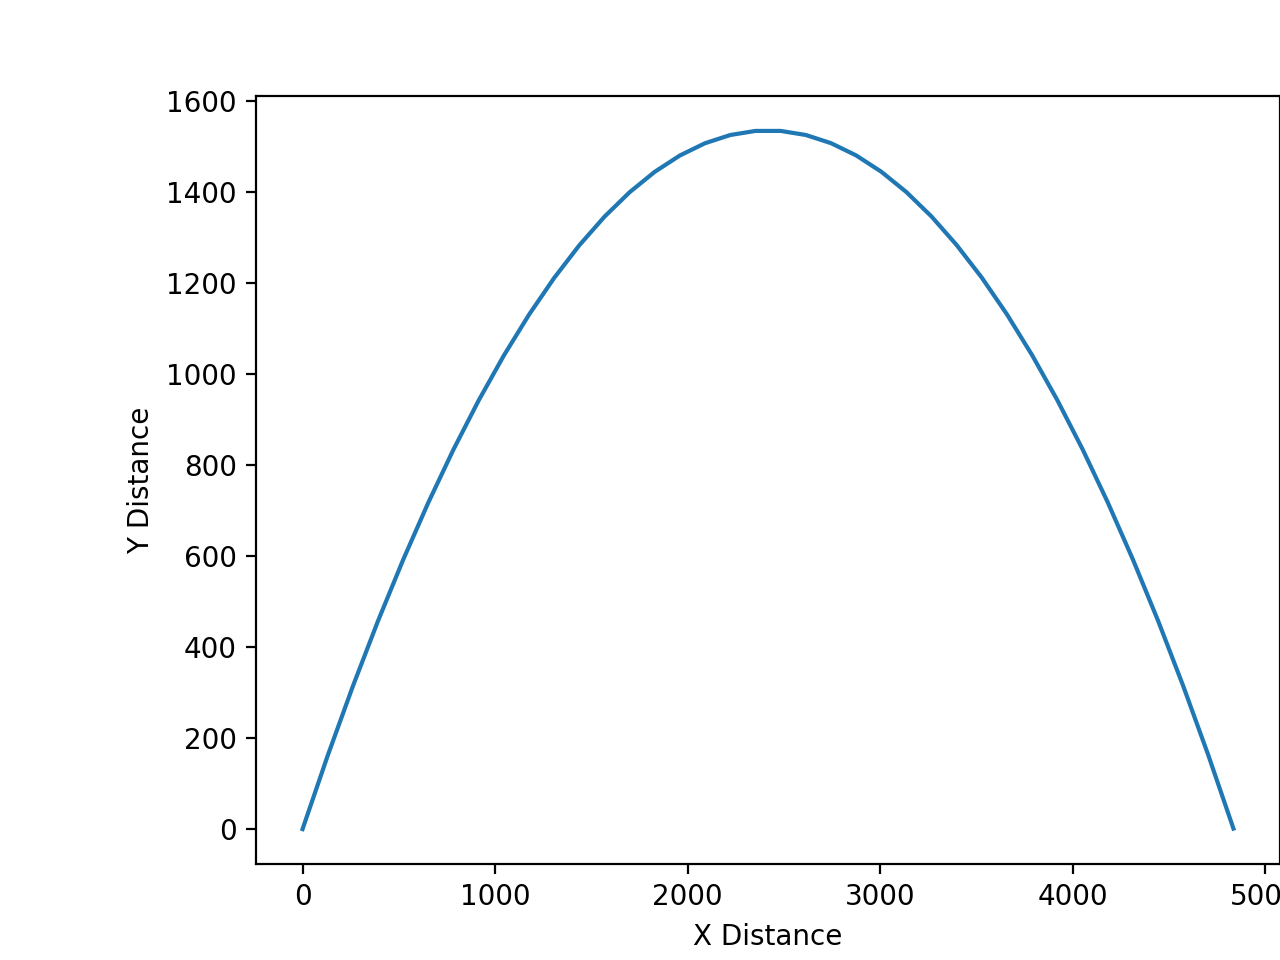

The total flighttime is 35.39 seconds.
The X distance covered is 4833.90 meters.


In [25]:
total_time2 = (time_array2.t[time_array2.y[1] >= 0]) #calculate when Y >=0 to determine time

x_values2 = time_array2.y[0]

y_values2 = time_array2.y[1]

restriction2 = np.where(time_array2.y[1] >=0) #restricts so only positive y values are displayed

x_restricted2 = x_values2[restriction2] #new restricted x values

y_restricted2 = y_values2[restriction2] #new restricted y values


fig = plt.figure()
ax = fig.add_axes([0.2,0.1,0.8,0.8])
ax.plot(x_restricted2, y_restricted2) #plot the restricted values
ax.set_xlabel('X Distance')
ax.set_ylabel('Y Distance')





print("The total flighttime is", f'{total_time2[-1]:.2f}', "seconds.")

print("The X distance covered is", f'{x_restricted2[-1]:.2f}', "meters.")





# Part d)

Now include the drag term with the atmospheric variation included [meaning $c(y) = \gamma D^2exp(-y/\lambda)$]

Write down the equations of motion (use the markup feature in Jupyter notbook and latex). For this part write out explicitly what $c$ is in your equations, e.g. $a*c = a* \gamma D^2exp(-y/\lambda)$. Your equations should depend only on $\gamma, \lambda, y, D, v, v_x, v_y, m,$ and $g$.

Equations with no air resistance ($c = const$):


* $v_x' = 0$ 

* $x' = v_x$

* $v_y' = -G$

* $y' = v_y$

Code the equations into a function

In [20]:
def proj_vac_air_resistance_atm(t, state):
    
    #time = ((2*initial_velocity*np.sin(angle_theta))/(-1*G))
    
    x = state[0]
    y = state[1]
    v_x = state[2]
    v_y = state[3]
    
    with_drag_force_atm = (.25*(15**2))*(np.exp((-1*y)/10000)) #unsure of 15 or .15??
    
    return_state = [v_x - with_drag_force_atm, v_y - with_drag_force_atm, 0, G]
    
    return return_state

Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 35\;s$

In [21]:
time = ((2*initial_velocity*np.sin(angle_theta))/(-1*G)) #used to calculate total airtime

timeLimit = np.linspace(0, time, num = 35)

state_0 = [0.0, 0.0, (300.0 * np.cos(math.radians(50.0))), (300.0 * np.sin(math.radians(50.0)))]

time_array3 = scipy.integrate.solve_ivp(proj_vac_air_resistance_atm, (0, 50), state_0 , method = 'RK45', t_eval = timeLimit)

print(time_array3)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.378e+00 ...  4.549e+01  4.687e+01]
        y: [[ 0.000e+00  1.892e+02 ...  6.374e+03  6.542e+03]
            [ 0.000e+00  2.308e+02 ... -2.091e+03 -2.496e+03]
            [ 1.928e+02  1.928e+02 ...  1.928e+02  1.928e+02]
            [ 2.298e+02  2.163e+02 ... -2.163e+02 -2.298e+02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 50
     njev: 0
      nlu: 0


Plot the ball's trajectory and find it's horizontal range. At what time does it hit the ground?

<IPython.core.display.Javascript object>


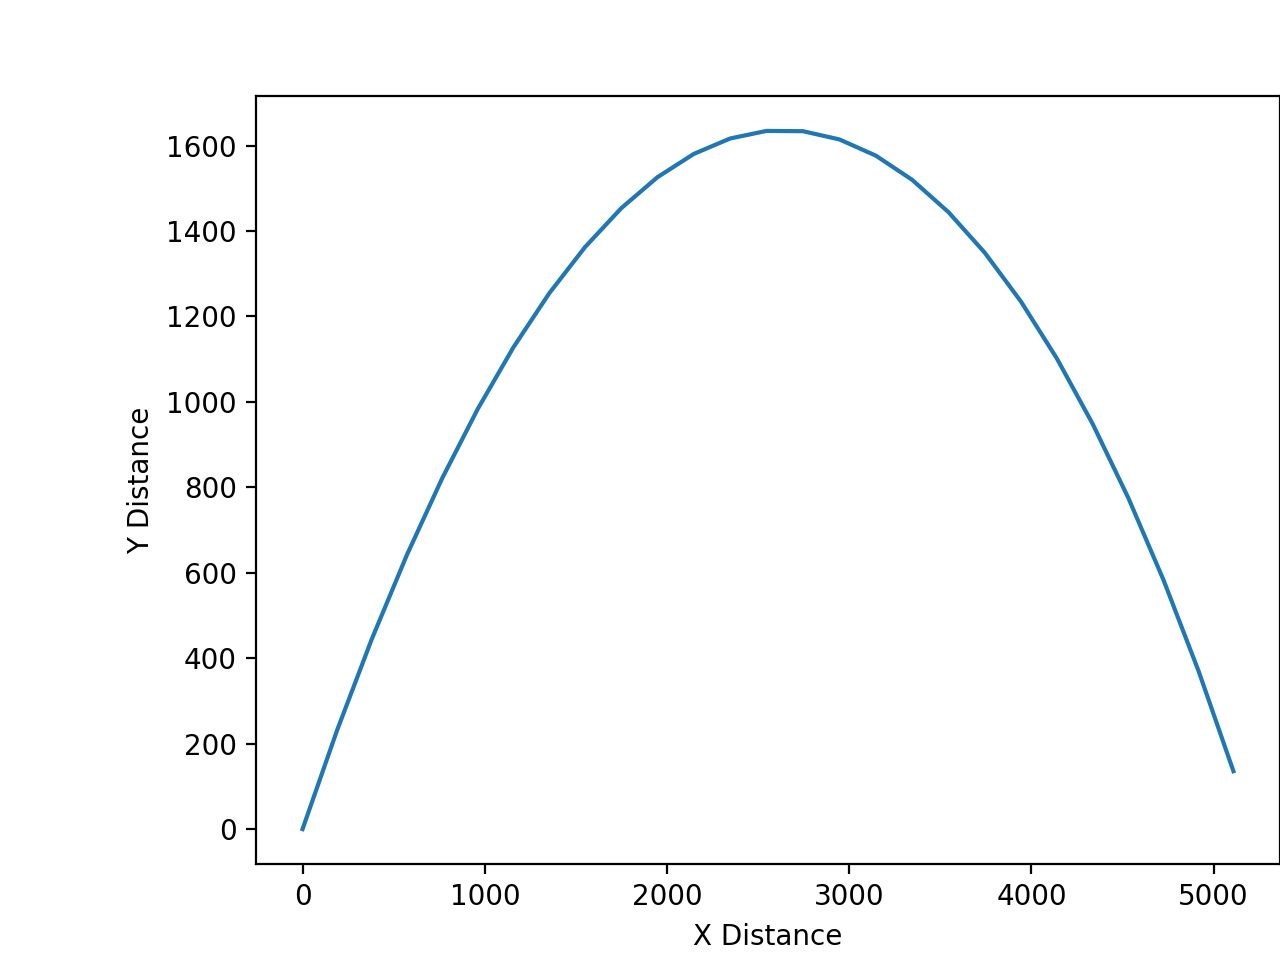

The total flighttime is 35.39 seconds.
The X distance covered is 5108.83 meters.


In [22]:
total_time3 = (time_array3.t[time_array3.y[1] >= 0]) #calculate when Y >=0 to determine time

x_values3 = time_array3.y[0]

y_values3 = time_array3.y[1]

restriction3 = np.where(time_array3.y[1] >=0) #restricts values where y>=0

x_restricted3 = x_values3[restriction3] 

y_restricted3 = y_values3[restriction3]


fig = plt.figure()
ax = fig.add_axes([0.2,0.1,0.8,0.8])
ax.plot(x_restricted3, y_restricted3) #plot the restricted values
ax.set_xlabel('X Distance')
ax.set_ylabel('Y Distance')





print("The total flighttime is", f'{total_time2[-1]:.2f}', "seconds.")

print("The X distance covered is", f'{x_restricted3[-1]:.2f}', "meters.")

# Part e)

Plot the trajectories from parts a), c), and d) on the same plot.

In [11]:
#codes

Your results should look like the plot below.

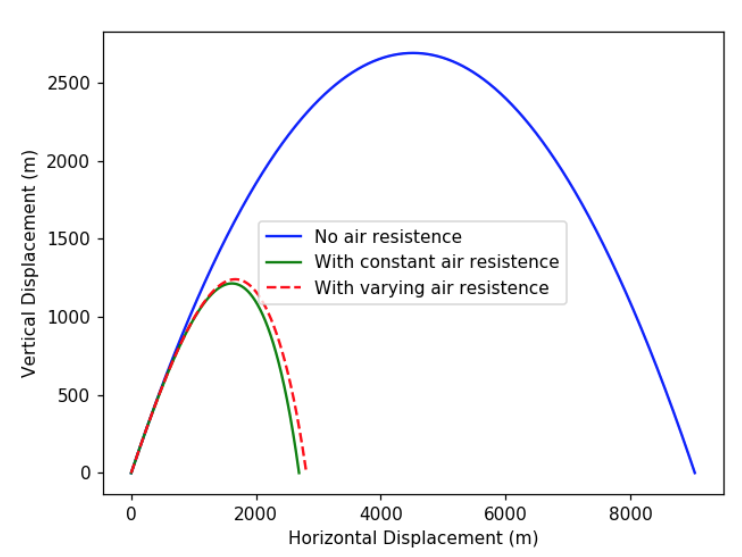

**What impacts the motion more: turning on air resistance (i.e with $c(0)$) or turning on the variation with atmosphere (i.e. $c(y)$) ?**

<IPython.core.display.Javascript object>


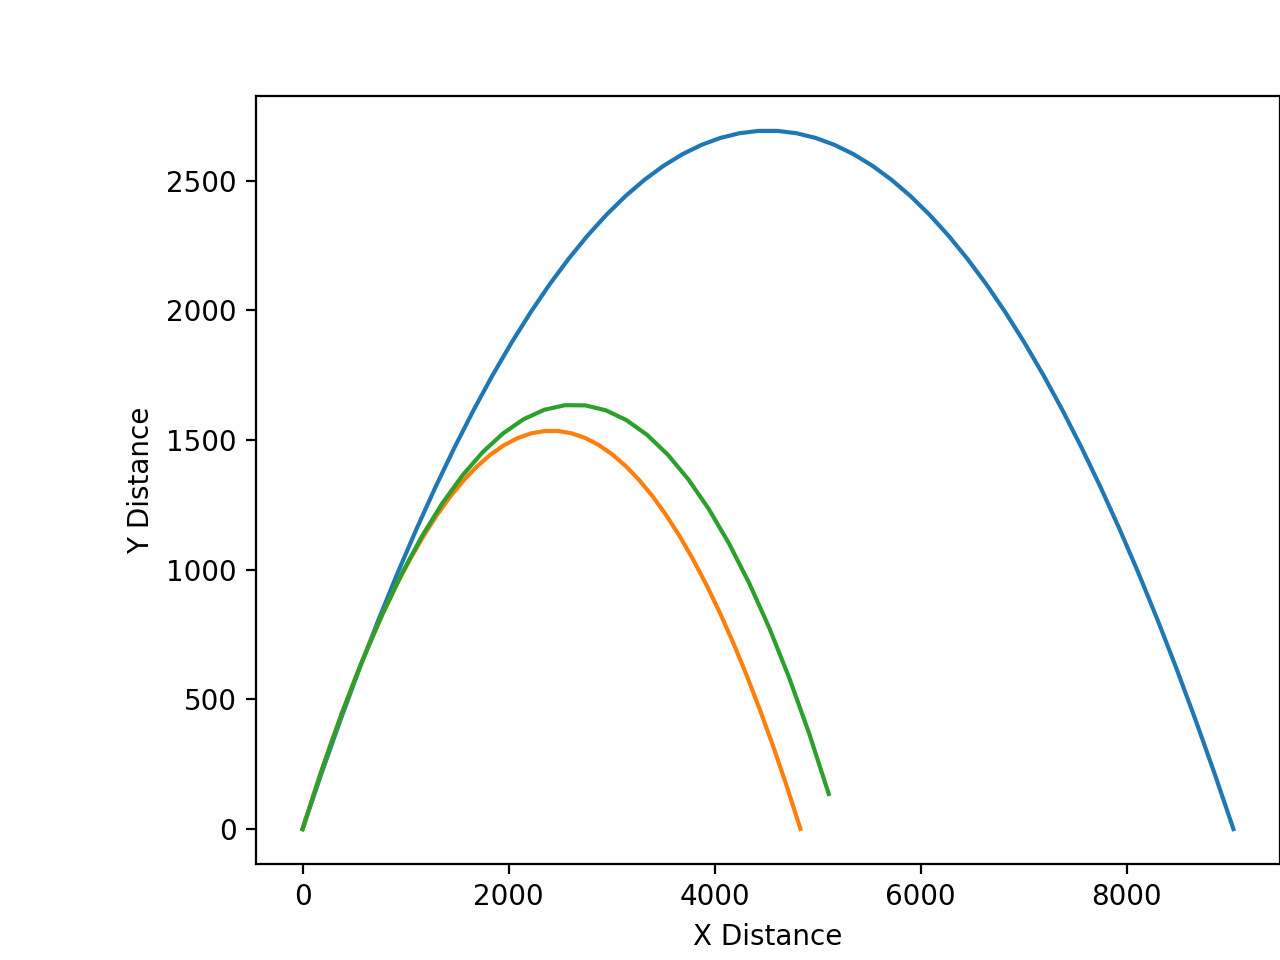

Text(0, 0.5, 'Y Distance')

In [29]:
fig = plt.figure()
ax = fig.add_axes([0.2,0.1,0.8,0.8])
ax.plot(x_restricted, y_restricted)
ax.plot(x_restricted2, y_restricted2)
ax.plot(x_restricted3, y_restricted3) #plot the restricted values
ax.set_xlabel('X Distance')
ax.set_ylabel('Y Distance')
